<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Canales%20de%20Youtube/Python%20Engineer/SVM_(Support_Vector_Machine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**

No conozco mucho sobre este algoritmo, pero al paracer tiene por objetivo la busqueda de un hiperplano que segregue los datos atendiendo a estas dos condiciones:

$$
wx - b = 0
$$

$$
max \quad \frac{2}{||w||}
$$

**Linear model (2 categorias (1 y -1))**

$$
wx - b = 0
$$

$$
wx_{i} - b \geq 1 \quad si \quad y_{i} = 1
$$

$$
wx_{i} - b \leq 1 \quad si \quad y_{i} = -1
$$

**Estas 3 ecuaciones se resumen en la siguiente:**

$$
y_{i}(wx_{i} - b) \geq 1
$$

**Funcion de costos (loss)**

$$
loss = λ||w||^2 + \frac{1}{n} \sum_{i=1}^{n} max(0, 1-y_{i}(wx_{i}-b))
$$

De esta manera las **derivadas** en funcion de los parametros siguen las siguientes reglas:

- si $y_{i}(xw - b) \geq 1$: 

$$
\left [\begin{array}{11} \frac{d_{loss}}{d_{w_{k}}} \\ \frac{d_{loss}}{db} \end{array} \right] = \left [\begin{array}{11} 2 \lambda w_{k} \\ 0 \end{array} \right] 
$$

- si $y_{i}(xw - b) < 1$:

$$
\left [\begin{array}{11} \frac{d_{loss}}{d_{w_{k}}} \\ \frac{d_{loss}}{db} \end{array} \right] = \left [\begin{array}{11} 2 \lambda w_{k} - y_{i} \cdot x_{i} \\ y_{i} \end{array} \right] 
$$

**Reglas de actualizacion (Gradient Descent)**

- Inicializar parametros
- Iterar
 - Calcular loss
 - Calcular gradiente
 - Actualizar parametros

 $$
w = w - lr \cdot dw
 $$

 $$
b = b - lr \cdot db
 $$

- Terminar de iterar


## **Armando el algoritmo desde cero**

In [1]:
import numpy as np

In [20]:
class SVM:
  def __init__(self, lr=0.001, lambda_par=0.01, n_iters=1000):
    self.lr = lr
    self.lambda_par = lambda_par
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    y_ = np.where(y <= 0, -1, 1) # corregimos las categorias en caso que no se encuentren diferenciadas con -1 y 1

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx]*(np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.lr*(2*self.lambda_par*self.w)
        else:
          self.w -= self.lr*(2*self.lambda_par*self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr*y_[idx]

  def predict(self, X):
    approx = np.dot(X, self.w) - self.b
    return np.sign(approx)

## **Probemos ahora el algoritmo**



In [21]:
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
 

In [22]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = SVM()
clf.fit(X_train, y_train)

def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / len(y_true)




In [23]:
predicciones = clf.predict(X_test)

acc = accuracy(y_test, predicciones)
acc

1.0

## **Visualizacion de resultados**

In [29]:
def visualize_svm():
  def get_hyperplane_value(x, w, b, offset):
    return (-w[0]*x + b + offset) /w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

  x0_1 = np.amin(X[:, 0])
  x0_2 = np.amax(X[:, 0])

  x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
  x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

  x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

  x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

  ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

  x1_min = np.amin(X[:, 1])
  x1_max = np.amax(X[:, 1])
  ax.set_ylim([x1_min - 3, x1_max + 3])

  plt.show()



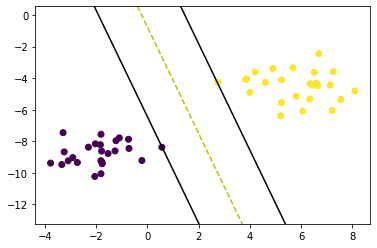

In [25]:
visualize_svm()

## **Probemos ahora con el algoritmo de sklearn**

**Nota**: Creo que es el `LinearSVC`

In [26]:
from sklearn.svm import LinearSVC

In [27]:
clf_sk = LinearSVC()
clf_sk.fit(X_train, y_train)

LinearSVC()

In [28]:
pred_sk = clf_sk.predict(X_test)

acc_sk = accuracy(y_test, pred_sk)
acc_sk

1.0